In [2]:
import pandas as pd

In [4]:
df = pd.read_csv('Results.csv')

In [5]:
df.head(5)

,Date,Outlet_id,Sub_cat_id,Qauntity,Price
0,2024-05-24,10178,154,2.0,245.0
1,2024-05-24,10178,151,2.0,245.0
2,2024-05-24,10178,151,1.0,150.0
3,2024-05-24,10178,151,1.0,150.0
4,2024-05-24,10178,151,3.0,450.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511722 entries, 0 to 1511721
Data columns (total 5 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Date        1511722 non-null  object 
 1   Outlet_id   1511722 non-null  int64  
 2   Sub_cat_id  1511722 non-null  int64  
 3   Qauntity    1511722 non-null  float64
 4   Price       1511722 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 57.7+ MB


In [10]:
# Remove rows where 'quantity' is 0
df = df[df['Qauntity'] != 0]

In [12]:
df['Date'] = pd.to_datetime(df['Date'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1503797 entries, 0 to 1511721
Data columns (total 5 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   Date        1503797 non-null  datetime64[ns]
 1   Outlet_id   1503797 non-null  int64         
 2   Sub_cat_id  1503797 non-null  int64         
 3   Qauntity    1503797 non-null  float64       
 4   Price       1503797 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 68.8 MB


In [16]:
top_30_prices = df.nlargest(20, 'Price')
print(top_30_prices)

              Date  Outlet_id  Sub_cat_id  Qauntity    Price
1450878 2024-06-14      10252         197     457.0  36480.0
1450879 2024-06-14      10252         119     457.0  36480.0
1450880 2024-06-14      10252         119     457.0  36480.0
1450881 2024-06-14      10252         202     457.0  36480.0
1450882 2024-06-14      10252         202     457.0  36480.0
1450883 2024-06-14      10252         202     457.0  36480.0
1450884 2024-06-14      10252         202     457.0  36480.0
1450885 2024-06-14      10252         202     457.0  36480.0
1450933 2024-06-14      10252         149     457.0  36480.0
1450934 2024-06-14      10252         199     457.0  36480.0
1450935 2024-06-14      10252         199     457.0  36480.0
1450936 2024-06-14      10252         188     457.0  36480.0
1450937 2024-06-14      10252         188     457.0  36480.0
1450938 2024-06-14      10252         197     457.0  36480.0
1451555 2024-06-14      10252         154     457.0  36480.0
1451556 2024-06-14      

In [18]:
df = df.drop(columns=['Price'])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1503797 entries, 0 to 1511721
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   Date        1503797 non-null  datetime64[ns]
 1   Outlet_id   1503797 non-null  int64         
 2   Sub_cat_id  1503797 non-null  int64         
 3   Qauntity    1503797 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 57.4 MB


In [22]:
import matplotlib.pyplot as plt


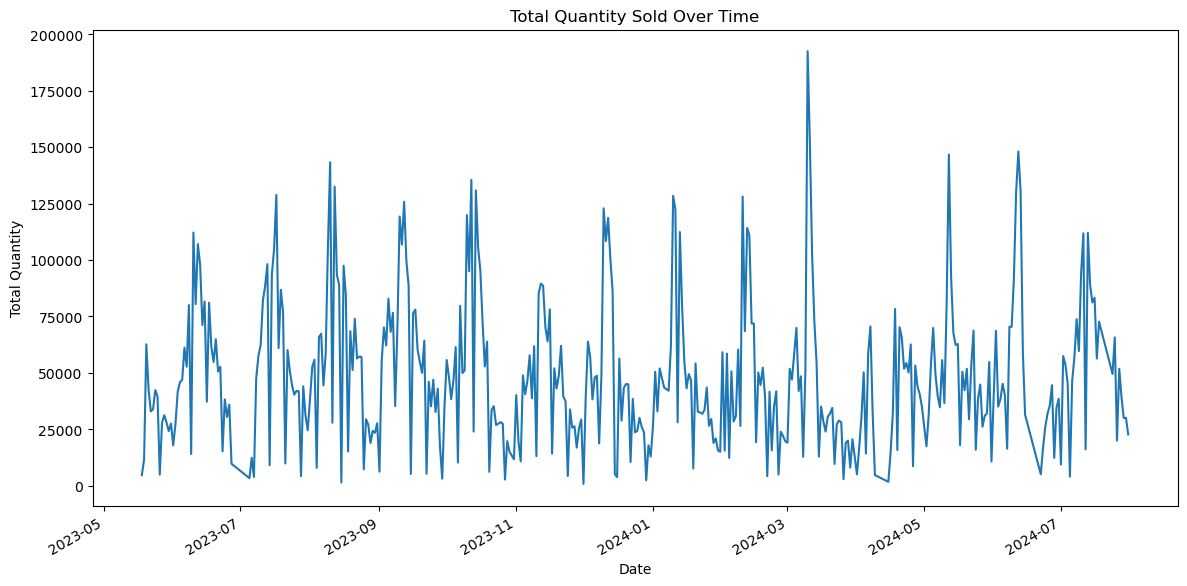

In [24]:
plt.figure(figsize=(14, 7))
df.groupby('Date')['Qauntity'].sum().plot(title='Total Quantity Sold Over Time')
plt.ylabel('Total Quantity')
plt.show()

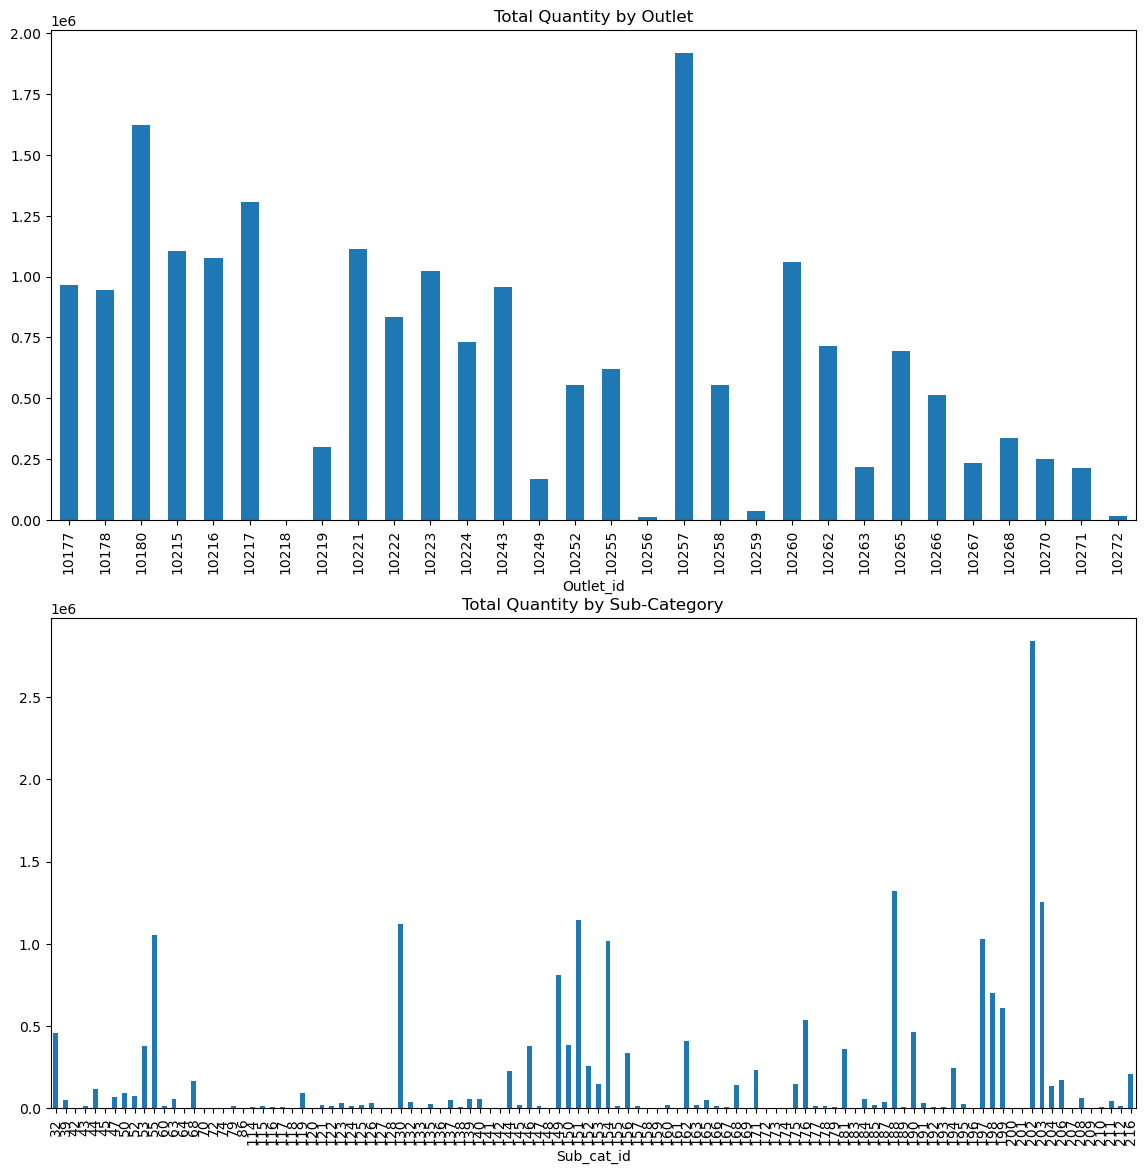

In [26]:
# Plotting quantity by outlet and sub-category
fig, ax = plt.subplots(2, 1, figsize=(14, 14))
df.groupby('Outlet_id')['Qauntity'].sum().plot(kind='bar', ax=ax[0], title='Total Quantity by Outlet')
df.groupby('Sub_cat_id')['Qauntity'].sum().plot(kind='bar', ax=ax[1], title='Total Quantity by Sub-Category')
plt.show()

In [28]:
print(df['Qauntity'].describe())

count    1.503797e+06
mean     1.336130e+01
std      2.004343e+01
min     -1.000000e+00
25%      3.000000e+00
50%      7.000000e+00
75%      1.595000e+01
max      2.501000e+03
Name: Qauntity, dtype: float64


In [30]:
df = df[df['Qauntity'] >= 0]

In [32]:
print(df['Qauntity'].describe())

count    1.503794e+06
mean     1.336133e+01
std      2.004344e+01
min      5.000000e-04
25%      3.000000e+00
50%      7.000000e+00
75%      1.595000e+01
max      2.501000e+03
Name: Qauntity, dtype: float64


In [ ]:
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Augmented Dickey-Fuller test
adf_result = adfuller(df['Qauntity'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

# ACF and PACF plots
fig, axes = plt.subplots(1, 2, figsize=(15, 4))
plot_acf(df['Qauntity'], ax=axes[0])
plot_pacf(df['Qauntity'], ax=axes[1], method='ywm')
plt.show()